Load the Libraries

In [39]:
import torch
import numpy as np
import matplotlib.pyplot as plt




Create auto generated data

In [40]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.4 * torch.randn(X.size())
 


Look at the shape of the data

In [41]:
print("X.shape: ", X.shape)
print("Y.shaoe: ", Y.shape)

X.shape:  torch.Size([100, 1])
Y.shaoe:  torch.Size([100, 1])


These are tensors with 100 rows and 1 column each. 

In [28]:
#Usual first step is to try to visualize the data

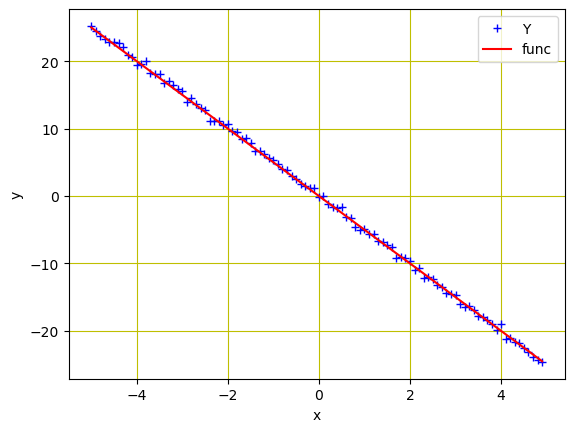

In [42]:
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()


Create the model and cost function

In [43]:
#Model
class RegressionModel(torch.nn.Module):
    def __init__(self, in_dim, out_dim):
        super(RegressionModel, self).__init__()
        self.linear= torch.nn.Linear(in_dim, out_dim, bias=True)
    
    def forward(self, x):
        out = self.linear(x)
        return out

in_dim = 1 #one batch with all examples
out_dim = 1 # only one regressor
model = RegressionModel(in_dim,out_dim)

#Cost function
criterion = torch.nn.MSELoss()

#learning rate
lr  = 0.1
#optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=lr)






Now Set up the learning rate and the number of epochs

In [44]:

#arrat to keep loss after each iteration
loss_list = []
# number of iterations
epochs = 20

Now we do a standar PyTorch training loop

In [45]:
for i  in range(epochs):
    #setup optimizer to zero grandients
    optimizer.zero_grad()
    # Make predictions for the all the examples in X (vectorization)
    Y_pred = model.forward(X)
    # now calculate the loss 
    loss = criterion(Y_pred, Y)
    #append the lost to the list
    loss_list.append(loss.item())
    #back propagation step
    loss.backward()
    #parameter update
    optimizer.step()
    # print diagnostic data
    print('{}, \t{}, \t{}'.format(i, loss.item(), [param.data for param in model.parameters()]))



0, 	154.8943328857422, 	[tensor([[-7.8998]]), tensor([-0.6787])]
1, 	69.17559051513672, 	[tensor([[-3.1211]]), tensor([-0.5597])]
2, 	30.96955108642578, 	[tensor([[-6.3073]]), tensor([-0.4168])]
3, 	13.928325653076172, 	[tensor([[-4.1807]]), tensor([-0.3343])]
4, 	6.319510459899902, 	[tensor([[-5.5983]]), tensor([-0.2470])]
5, 	2.9172213077545166, 	[tensor([[-4.6519]]), tensor([-0.1914])]
6, 	1.3927009105682373, 	[tensor([[-5.2826]]), tensor([-0.1375])]
7, 	0.7075502872467041, 	[tensor([[-4.8613]]), tensor([-0.1006])]
8, 	0.3983399569988251, 	[tensor([[-5.1419]]), tensor([-0.0669])]
9, 	0.2579743266105652, 	[tensor([[-4.9544]]), tensor([-0.0427])]
10, 	0.19373928010463715, 	[tensor([[-5.0793]]), tensor([-0.0215])]
11, 	0.16402000188827515, 	[tensor([[-4.9958]]), tensor([-0.0058])]
12, 	0.1500682830810547, 	[tensor([[-5.0513]]), tensor([0.0076])]
13, 	0.14339430630207062, 	[tensor([[-5.0141]]), tensor([0.0178])]
14, 	0.14012661576271057, 	[tensor([[-5.0388]]), tensor([0.0263])]
15, 	0.1

Finally Plot the loss after each iteration

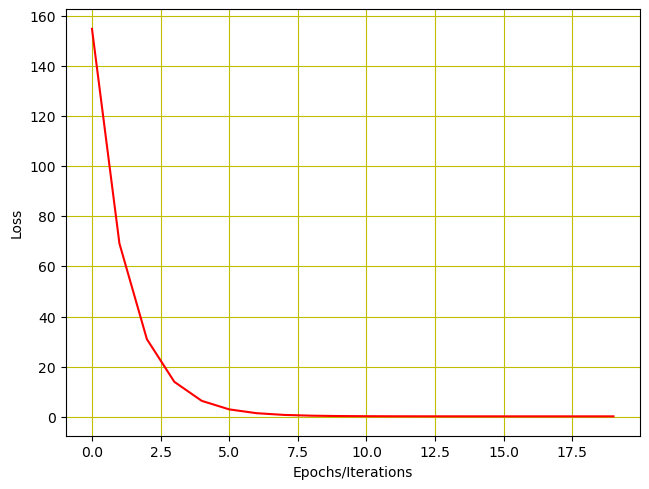

In [46]:
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [57]:
data = []
data.append(1.0)
data.append(4.0)
data.append(7.0)

x_data = torch.tensor(data)
print(x_data)
print("x_data.shape: ", x_data.shape)

X1 = torch.arange(-5, 5, 0.3)
print("X1.shape: ", X1.shape)
print("X1: ", X1)

X2 = torch.arange(-5, 5, 0.3).view(-1, 1)
print(X2)

Y2 = model.forward(X2)
print("Y2: ", Y2)

x_data = x_data.view(-1, 1)
Y2 = model.forward(x_data)
print("Y2: ", Y2)


tensor([1., 4., 7.])
x_data.shape:  torch.Size([3])
X1.shape:  torch.Size([34])
X1:  tensor([-5.0000, -4.7000, -4.4000, -4.1000, -3.8000, -3.5000, -3.2000, -2.9000,
        -2.6000, -2.3000, -2.0000, -1.7000, -1.4000, -1.1000, -0.8000, -0.5000,
        -0.2000,  0.1000,  0.4000,  0.7000,  1.0000,  1.3000,  1.6000,  1.9000,
         2.2000,  2.5000,  2.8000,  3.1000,  3.4000,  3.7000,  4.0000,  4.3000,
         4.6000,  4.9000])
tensor([[-5.0000],
        [-4.7000],
        [-4.4000],
        [-4.1000],
        [-3.8000],
        [-3.5000],
        [-3.2000],
        [-2.9000],
        [-2.6000],
        [-2.3000],
        [-2.0000],
        [-1.7000],
        [-1.4000],
        [-1.1000],
        [-0.8000],
        [-0.5000],
        [-0.2000],
        [ 0.1000],
        [ 0.4000],
        [ 0.7000],
        [ 1.0000],
        [ 1.3000],
        [ 1.6000],
        [ 1.9000],
        [ 2.2000],
        [ 2.5000],
        [ 2.8000],
        [ 3.1000],
        [ 3.4000],
        [ 3.7000]